## Notebook for Analysing the Dataset

Dataset - https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/

### Importing Libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /home/jyolsna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jyolsna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading True News Articles

In [16]:
true_data = pd.read_csv('News-_dataset/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Reading Fake News Articles

In [17]:
false_data = pd.read_csv('News-_dataset/Fake.csv')
false_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### No. of News Articles and Finding Missing Entries

In [18]:
print("Number of true news articles: ", len(true_data))
print("Number of false news articles: ", len(false_data))

Number of true news articles:  21417
Number of false news articles:  23481


In [19]:
true_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [20]:
false_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Preprocessing for generating Word Cloud

In [21]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        sentence = re.sub(r'[^a-z\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text


In [22]:
preprocessed_review = preprocess_text(true_data['text'].values)
true_data['Prepro_text'] = preprocessed_review


100%|██████████| 21417/21417 [08:28<00:00, 42.11it/s]


In [23]:
preprocessed_review = preprocess_text(false_data['text'].values)
false_data['Prepro_text'] = preprocessed_review


100%|██████████| 23481/23481 [10:01<00:00, 39.02it/s] 


### Word Cloud for True and Fake News Articles

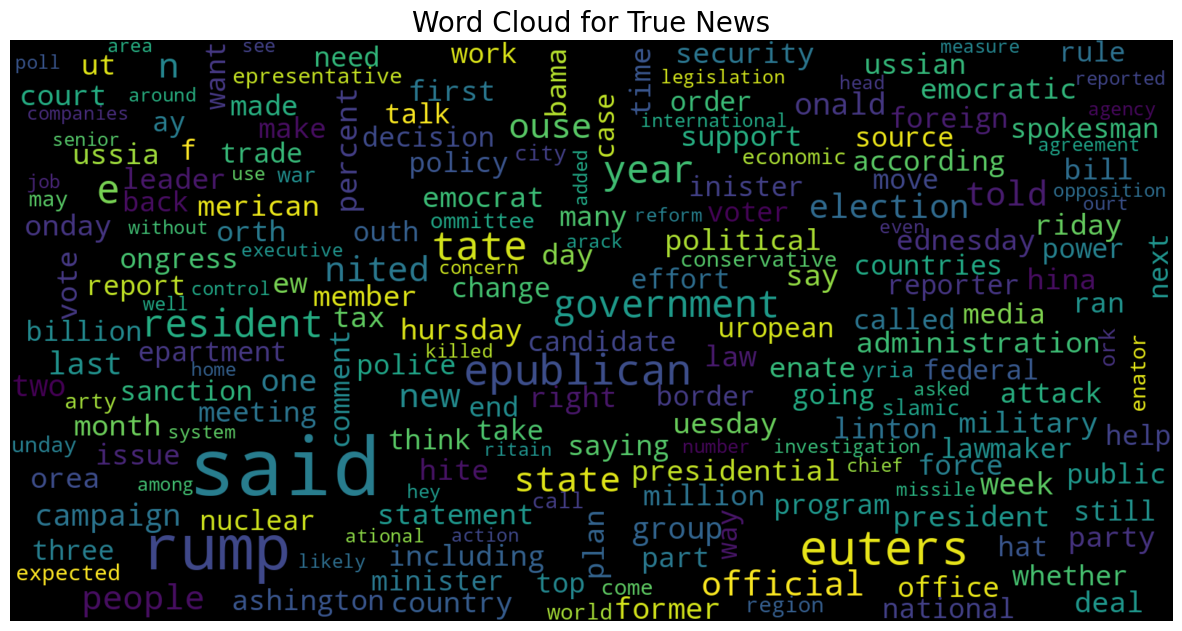

In [24]:
consolidated = ' '.join(
    word for word in true_data['Prepro_text'].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News', fontsize=20)
plt.show()


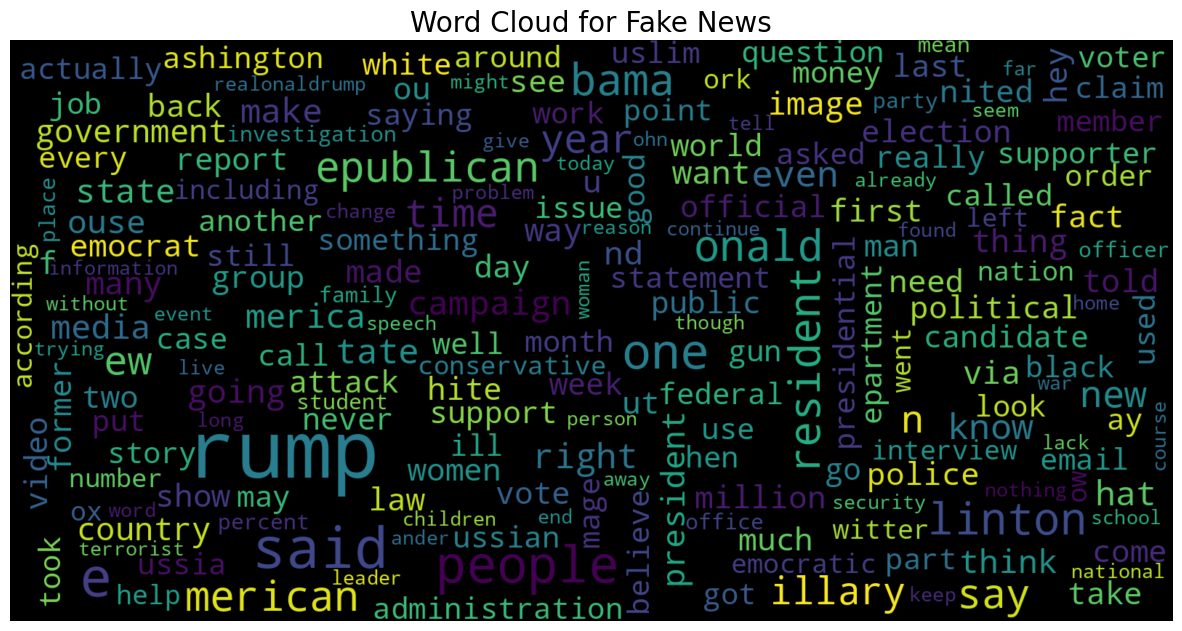

In [25]:
# Fake
consolidated = ' '.join(
    word for word in false_data['Prepro_text'].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News', fontsize=20)
plt.show()


### Distribution of News Article Length

Max sequence length in True News Articles :  2472


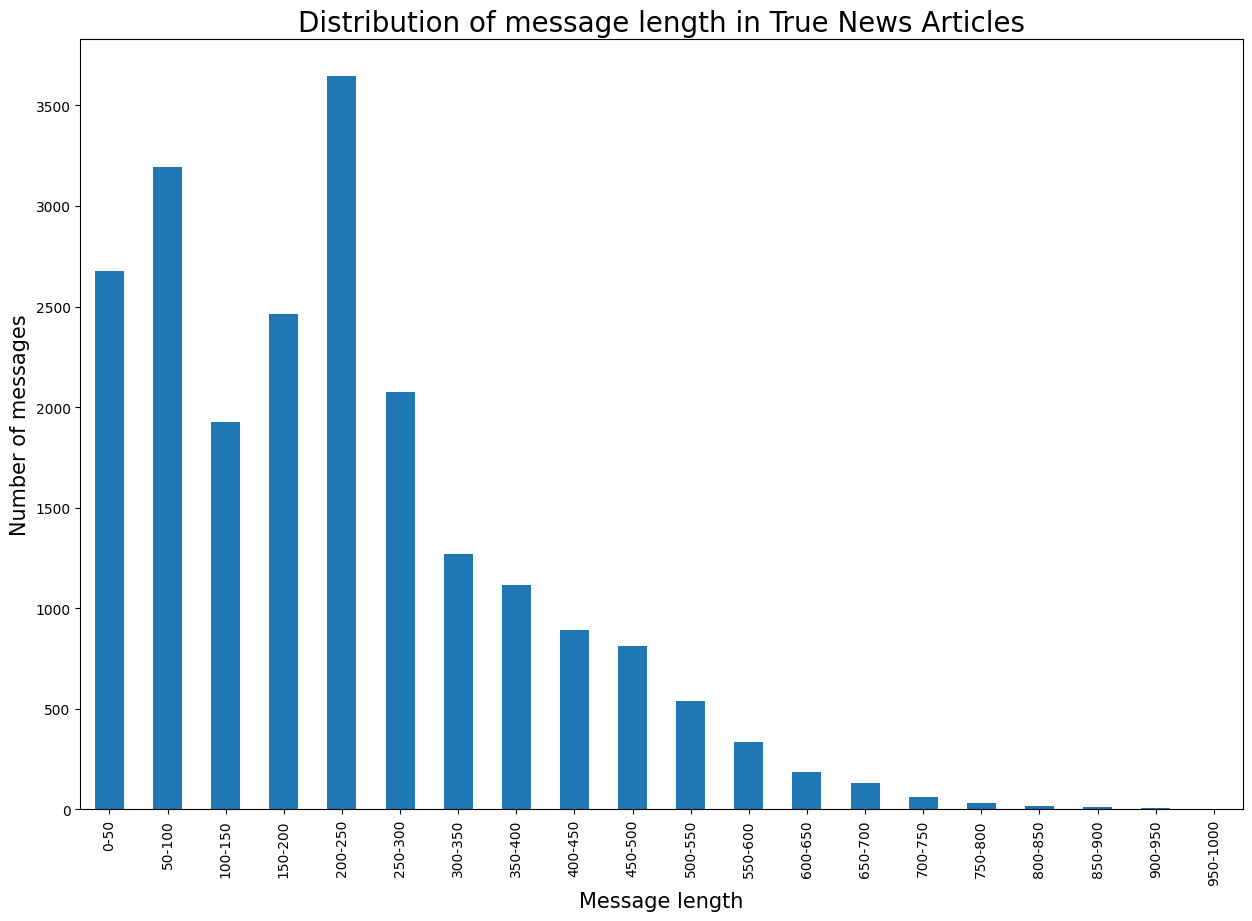

In [26]:
seq_len = [len(i.split()) for i in true_data['Prepro_text']]
max_seq_len = max(seq_len)
print('Max sequence length in True News Articles : ', max_seq_len)

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850', '850-900', '900-950', '950-1000']
a = pd.cut(seq_len, bins=bins, labels=labels)
a.value_counts().sort_index().plot(kind='bar', figsize=(15, 10))
plt.title('Distribution of message length in True News Articles', fontsize=20)
plt.xlabel('Message length', fontsize=15)
plt.ylabel('Number of messages', fontsize=15)
plt.show()

Max sequence length in Fake News Articles :  4774


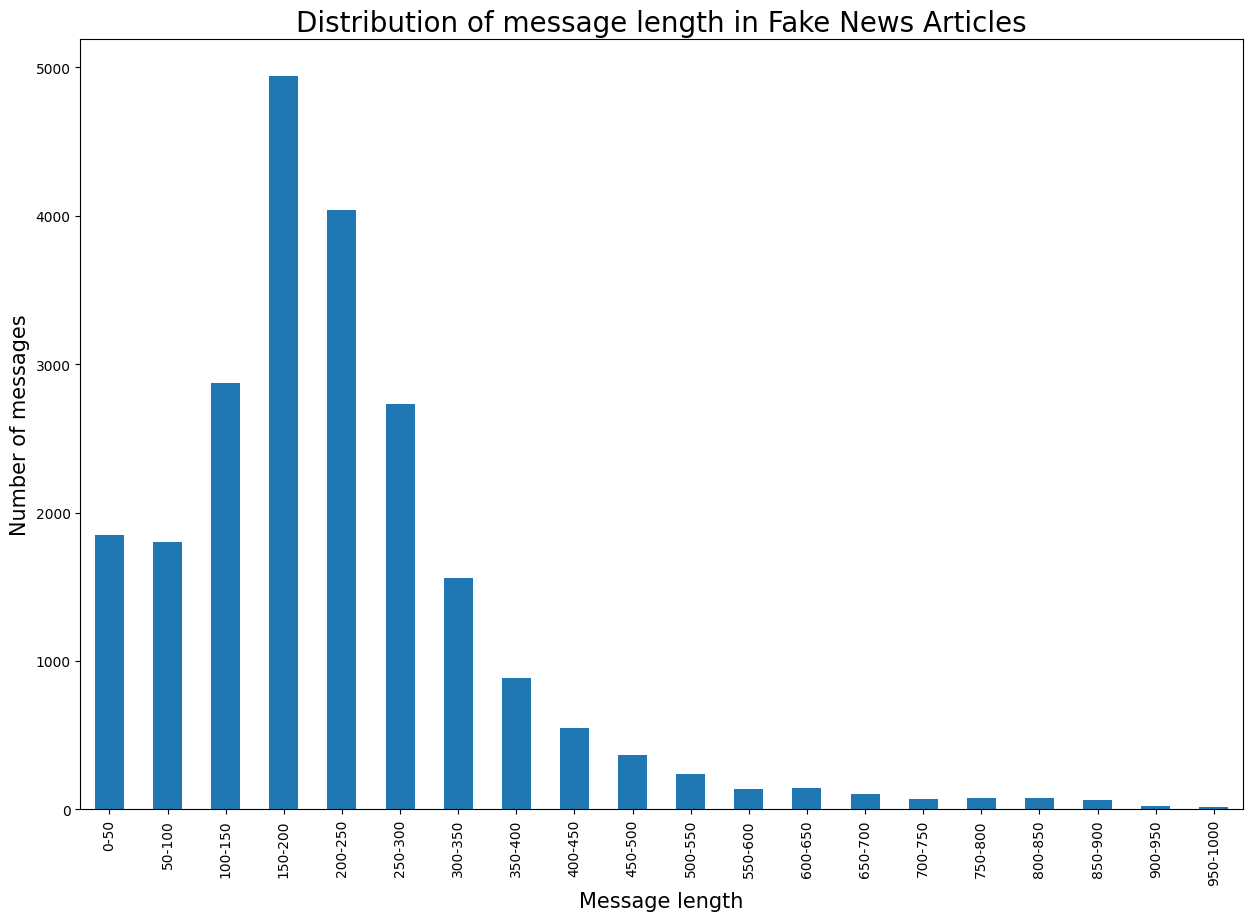

In [27]:
seq_len = [len(i.split()) for i in false_data['Prepro_text']]
max_seq_len = max(seq_len)
print('Max sequence length in Fake News Articles : ', max_seq_len)

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850', '850-900', '900-950', '950-1000']
a = pd.cut(seq_len, bins=bins, labels=labels)
a.value_counts().sort_index().plot(kind='bar', figsize=(15, 10))
plt.title('Distribution of message length in Fake News Articles', fontsize=20)
plt.xlabel('Message length', fontsize=15)
plt.ylabel('Number of messages', fontsize=15)
plt.show()